In [27]:
import numpy as np
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


# 랜덤시드 고정시키기
np.random.seed(3)

Datageration Class1

In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

img = load_img('DataSets/D/20200111_113051.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

for batch in train_datagen.flow(x, batch_size=1, save_to_dir='DataSets/D', save_prefix='tri', save_format='png'):
    i += 1
    if i > 100: 
        break

Datageneration Class2

In [11]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

img = load_img('DataSets_02/train/FacePic_Class1/EO (1) copy 18.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

for batch in train_datagen.flow(x, batch_size=1, save_to_dir='DataSets_02/train/FacePic_Class1', save_prefix='tri', save_format='png'):
    i += 1
    if i > 5: 
        break

Datageneration Class3

In [63]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

img = load_img('DataSets/test/bottletype3/bottle030.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

for batch in train_datagen.flow(x, batch_size=1, save_to_dir='DataSets/test/bottletype3', save_prefix='tri', save_format='png'):
    i += 1
    if i > 20: 
        break
        


Traing Setting

In [28]:
train_generator = train_datagen.flow_from_directory(
        'DataSets_02/train',
        target_size=(24, 24),
        batch_size=12,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'DataSets_02/test',
        target_size=(24, 24),    
        batch_size=12,
        class_mode='categorical')

Found 468 images belonging to 12 classes.
Found 462 images belonging to 12 classes.


In [29]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(12, activation='softmax'))

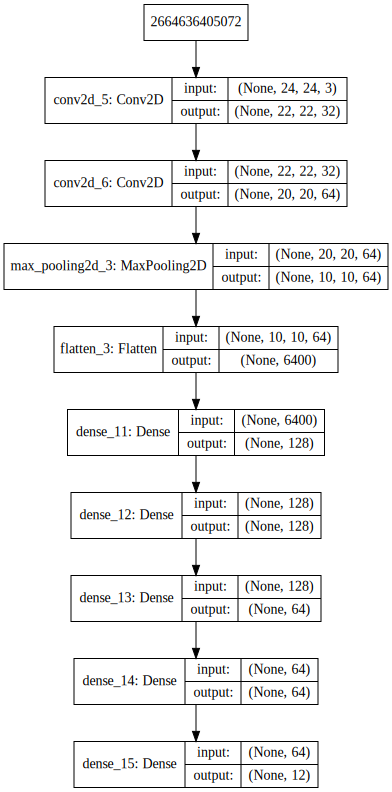

In [30]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1)

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
tb_hist = keras.callbacks.TensorBoard(log_dir='graph2', histogram_freq=0, write_graph=True, write_images=True)

keras.callbacks.TensorBoard(log_dir='DataSets/graph', histogram_freq=0, batch_size=3, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')

In [34]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 100,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5,
        callbacks=[early_stopping, tb_hist])

Epoch 1/50
1500/1500 [==============================] - 1222s 814ms/step - loss: 1.4452 - acc: 0.3072 - val_loss: 1.3649 - val_acc: 0.3333

Epoch 2/50
1500/1500 [==============================] - 1214s 809ms/step - loss: 1.3241 - acc: 0.3614 - val_loss: 1.2858 - val_acc: 0.3667
Epoch 3/50
1500/1500 [==============================] - 1213s 809ms/step - loss: 1.2512 - acc: 0.4111 - val_loss: 1.4453 - val_acc: 0.3167
Epoch 00003: early stopping


In [35]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 33.33%


In [36]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'AfterFacePic_Class4': 0, 'AfterTeethPic_Class4': 1, 'AfterXrayPic_Class4': 2, 'FacePic_Class1': 3, 'FacePic_Class2': 4, 'FacePic_Class3': 5, 'TeethPic_Class1': 6, 'TeethPic_Class2': 7, 'TeethPic_Class3': 8, 'XrayPic_Class1': 9, 'XrayPic_Class2': 10, 'XrayPic_Class3': 11}
[[0.000 0.019 0.000 0.000 0.000 0.000 0.106 0.075 0.800 0.000 0.000 0.000]
 [0.000 0.200 0.000 0.000 0.000 0.000 0.431 0.161 0.207 0.000 0.000 0.000]
 [0.470 0.000 0.000 0.154 0.212 0.162 0.001 0.000 0.000 0.000 0.000 0.000]
 [0.565 0.000 0.000 0.166 0.189 0.080 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.439 0.000 0.000 0.237 0.182 0.142 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.114 0.000 0.001 0.001 0.000 0.430 0.139 0.314 0.000 0.000 0.000]
 [0.000 0.000 0.131 0.000 0.000 0.000 0.000 0.000 0.000 0.424 0.292 0.153]
 [0.287 0.000 0.000 0.231 0.163 0.318 0.001 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.137 0.000 0.000 0.000 0.000 0.000 0.000 0.411 0.283 0.169]
 [0.000 0.000 0.138 0.000 0.000 0.000

In [37]:
model_json = model.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)

In [38]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
